In [2]:
import cv2

import matplotlib.pyplot as plt

%matplotlib inline

## Use only the location of the Door

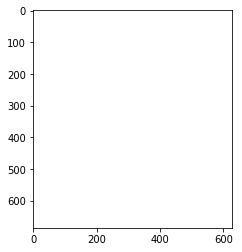

In [14]:
Door = cv2.imread('temp\\Door75.jpg',1)
Door = cv2.blur(Door,(7,7))
#_, Gray = cv2.threshold(Door, 18, 255, cv2.THRESH_BINARY_INV)
Door_HSV = cv2.cvtColor(Door, cv2.COLOR_BGR2HSV)
Door_threshold = cv2.inRange(Door_HSV, (0, 0, 0), (255, 255, 255))
plt.imshow(cv2.cvtColor(Door_threshold, cv2.COLOR_BGR2RGB))

In [ ]:
from __future__ import print_function
import cv2 as cv
import argparse
import numpy as np

max_value = 255
max_value_H = 360//2
low_H = 0
low_S = 0
low_V = 0
high_H = max_value_H
high_S = max_value
high_V = max_value
window_capture_name = 'Video Capture'
window_detection_name1 = 'Object Detection1'
window_detection_name2 = 'Object Detection2'
window_detection_name3 = 'Object Detection3'

low_H_name = 'Low H'
low_S_name = 'Low S'
low_V_name = 'Low V'
high_H_name = 'High H'
high_S_name = 'High S'
high_V_name = 'High V'
def on_low_H_thresh_trackbar(val):
    global low_H
    global high_H
    low_H = val
    low_H = min(high_H-1, low_H)
    cv.setTrackbarPos(low_H_name, window_detection_name1, low_H)
    
def on_high_H_thresh_trackbar(val):
    global low_H
    global high_H
    high_H = val
    high_H = max(high_H, low_H+1)
    cv.setTrackbarPos(high_H_name, window_detection_name1, high_H)
def on_low_S_thresh_trackbar(val):
    global low_S
    global high_S
    low_S = val
    low_S = min(high_S-1, low_S)
    cv.setTrackbarPos(low_S_name, window_detection_name1, low_S)
def on_high_S_thresh_trackbar(val):
    global low_S
    global high_S
    high_S = val
    high_S = max(high_S, low_S+1)
    cv.setTrackbarPos(high_S_name, window_detection_name1, high_S)
def on_low_V_thresh_trackbar(val):
    global low_V
    global high_V
    low_V = val
    low_V = min(high_V-1, low_V)
    cv.setTrackbarPos(low_V_name, window_detection_name1, low_V)
def on_high_V_thresh_trackbar(val):
    global low_V
    global high_V
    high_V = val
    high_V = max(high_V, low_V+1)
    cv.setTrackbarPos(high_V_name, window_detection_name1, high_V)
    
    
cv.namedWindow(window_capture_name)
cv.namedWindow(window_detection_name1)
cv.namedWindow(window_detection_name2)
cv.namedWindow(window_detection_name3)
cv.createTrackbar(low_H_name, window_detection_name1 , low_H, max_value_H, on_low_H_thresh_trackbar)
cv.createTrackbar(high_H_name, window_detection_name1 , high_H, max_value_H, on_high_H_thresh_trackbar)
cv.createTrackbar(low_S_name, window_detection_name1 , low_S, max_value, on_low_S_thresh_trackbar)
cv.createTrackbar(high_S_name, window_detection_name1 , high_S, max_value, on_high_S_thresh_trackbar)
cv.createTrackbar(low_V_name, window_detection_name1 , low_V, max_value, on_low_V_thresh_trackbar)
cv.createTrackbar(high_V_name, window_detection_name1 , high_V, max_value, on_high_V_thresh_trackbar)


def process_the_image(image):
    image = cv.blur(image,(7,7))
    image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    #image = cv.inRange(image, (15, 7, 0), (135, 204, 24))
    #image = cv.inRange(image, (32, 7, 0), (123, 153, 45))
    
    #image = cv.inRange(image, (0, 36, 0), (122, 72, 26))
    #image = cv.inRange(image, (106, 0, 0), (180, 255, 255))
    #image = cv.inRange(image, (26, 0, 0), (74, 255, 255))
    
    image = cv.inRange(image, (low_H, low_S, low_V), (high_H, high_S, high_V))
    #image = cv.Canny(image, low_S, high_S)
    kernel = np.ones((11,11),np.uint8) 
    image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)    
    
    
    
    return image
    

while(1):
    frame = cv.imread('temp\\F_Door.jpg',1)
    frame_threshold = process_the_image(frame)
    
    frame2 = cv.imread('temp2\\F_Door.jpg',1)
    frame_threshold2 = process_the_image(frame2)
    
    frame3 = cv.imread('temp3\\F_Door.jpg',1)
    frame_threshold3 = process_the_image(frame3)


    cv.imshow(window_capture_name, frame)
    
    cv.imshow(window_detection_name1, frame_threshold)
    cv.imshow(window_detection_name2, frame_threshold2)
    cv.imshow(window_detection_name3, frame_threshold3)
    

    key = cv.waitKey(30)
    if key == ord('q') or key == 27:
        break    

        
#H: 15 135
#S: 7 204
#V: 0 24

In [99]:
import cv2 as cv
import argparse
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def process_the_image(original_image):
    draw_image = original_image.copy()
    contour_img_car_window = preprocessing_the_car_window(original_image.copy())
    draw_image = draw_contour_of_the_car_window(draw_image, contour_img_car_window)
    
#     contour_img_car_bottom = preprocessing_the_car_bottom(original_image.copy())
#     draw_image = draw_contour_of_the_car_bottom(draw_image, contour_img_car_bottom)    
    
    
    
    return draw_image

def preprocessing_the_car_bottom(image):
    image = cv.blur(image,(15,15))
    image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    #image = cv.inRange(image, (15, 7, 0), (135, 204, 24))
    window_door_image = cv.inRange(image, (32, 7, 0), (123, 153, 30))
    pathimage = cv.inRange(image, (26, 0, 0), (74, 255, 255))
    image = window_door_image - pathimage
    image[image == 1] = 255
    kernel = np.ones((23,23),np.uint8) 
    image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)    
    kernel = np.ones((17,17),np.uint8) 
    image = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)

    return image

def preprocessing_the_car_window(image):
    image = cv.blur(image,(5,5))
    image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    #image = cv.inRange(image, (15, 7, 0), (135, 204, 24))
    image = cv.inRange(image, (32, 7, 0), (123, 153, 30))
    #pathimage = cv.inRange(image, (26, 0, 0), (74, 255, 255))
    #image = window_door_image-pathimage
#     kernel = np.ones((23,23),np.uint8) 
#     image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)    
#     kernel = np.ones((17,17),np.uint8) 
#     image = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)
    
    return image

#找到車門底部線
def draw_contour_of_the_car_bottom(original_img, contour_img):
    #讓右上三角形變為0
    triangle_cnt = np.array( [(0, 0), (contour_img.shape[1], 0), (contour_img.shape[1], contour_img.shape[0]), (contour_img.shape[1]//2, contour_img.shape[0]//2), (0, contour_img.shape[0]//2)])
    cv.drawContours(contour_img, [triangle_cnt], 0, (0,0,0), -1)
    #找到輪廓
    contours, hierarchy = cv.findContours(contour_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    #cv.drawContours(original_img, contours, -1, (0,255,0), 3)
    area_threshold = 10000
    
    for i in range(len(contours)):
        area = cv.contourArea(contours[i])
        
        if area>area_threshold:
            cv.drawContours(original_img, contours, i, (0,0,255), -1)
            
    return original_img


#找到車窗線
def draw_contour_of_the_car_window(original_img, contour_img):
    contours, hierarchy = cv.findContours(contour_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    #cv.drawContours(original_img, contours, -1, (0,255,0), 3)
    area_threshold = 10000
    window_extRight_list = []
    
    for i in range(len(contours)):
        area = cv.contourArea(contours[i])
        
        if area>area_threshold:
            # find the bottom point by x coordinate
#             contour_sorted = np.array(sorted(contours[i].reshape(contours[i].shape[0], contours[i].shape[2]) , key=lambda k: [k[0], k[1]]))
#             value, ind = np.unique(contour_sorted[:,0], return_index=True)
#             ind[0] = contour_sorted.shape[0]
#             res = contour_sorted[np.roll(ind, -1) -1]
            
#             bottom_contour = res.reshape(res.shape[0], 1, 2)
#             cv.drawContours(original_img, bottom_contour, -1, (255,255,0), 3)
            
            # 找到contour的中心點
            M = cv.moments(contours[i])
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])        
            print("center point", (cX, cY))
            
            #=====用中心點位置分辨車窗和車門
            if(cY>original_img.shape[0]/2):#車門
                print(np.array(contours).shape)
                cv.drawContours(original_img, contours, i, (255,0,0), -1)
                
#                 hull_list = []
#                 hull_list.append(cv.convexHull(contours[i]))
#                 cv.drawContours(original_img, hull_list, 0, (0,0,255), -1)

            else:#車窗
                #cv.drawContours(original_img, contours, i, (0,0,255), -1)
                hull_list = []
                hull_list.append(cv.convexHull(contours[i]))
                cv.drawContours(original_img, hull_list, 0, (0,0,255), -1)
                #=====找車窗最右邊的點
                #x,y,w,h = cv.boundingRect(contours[i])
                #cv.rectangle(original_img, (x, y), (x + w, y + h), (0, 255,0), 2)
                extRight = tuple(contours[i][contours[i][:, :, 0].argmin()][0])#extLeft
                #extRight = tuple(contours[i][contours[i][:, :, 0].argmax()][0])
                window_extRight_list.append(extRight)

    #畫車窗最右邊的點
    extRight = max(window_extRight_list,key=lambda item:item[1])
    cv.circle(original_img, extRight, 20, (0, 255, 255), -1)
    cv.rectangle(original_img, (0, 0), (extRight[0], original_img.shape[0]), (0, 255,0), -1)
    #cv.rectangle(original_img,(extRight[0], 0),(original_img.shape[1], original_img.shape[0]) , (0, 255,0), -1)

    
    return original_img

filelist = ['temp\\F_Door.jpg', 'temp2\\F_Door.jpg', 'temp3\\F_Door.jpg']

print(filelist[0])
frame = cv.imread(filelist[0], 1)
frame_threshold = process_the_image(frame)

print(filelist[1])
frame2 = cv.imread(filelist[1], 1)
frame_threshold2 = process_the_image(frame2)

print(filelist[2])
frame3 = cv.imread(filelist[2], 1)
frame_threshold3 = process_the_image(frame3)




temp\F_Door.jpg
center point (110, 545)
(471,)
center point (411, 261)
temp2\F_Door.jpg
center point (137, 555)
(200,)
center point (433, 231)
temp3\F_Door.jpg
center point (393, 542)
(475,)
center point (463, 216)


c:\users\t-rex\anaconda3\envs\car_detection\lib\site-packages\ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


True

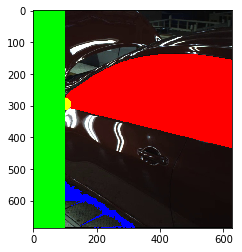

In [100]:
plt.imshow(cv.cvtColor(frame_threshold, cv.COLOR_BGR2RGB))
cv.imwrite('1_B.jpg', frame_threshold)

True

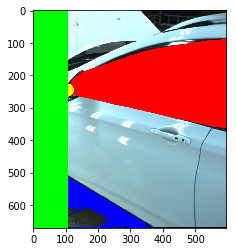

In [101]:
plt.imshow(cv.cvtColor(frame_threshold2, cv.COLOR_BGR2RGB))
cv.imwrite('2_B.jpg', frame_threshold2)

True

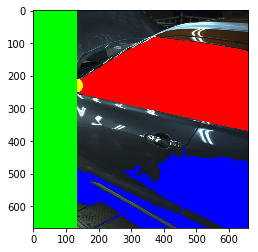

In [102]:
plt.imshow(cv.cvtColor(frame_threshold3, cv.COLOR_BGR2RGB))
cv.imwrite('3_B.jpg', frame_threshold3)

### Reference

[find extreme point from contour](https://www.pyimagesearch.com/2016/04/11/finding-extreme-points-in-contours-with-opencv/)